Use Dataset: phoenix-2014
배치 내 샘플 개수: 2
첫 번째 샘플 인덱스: 385
첫 번째 샘플 프레임 텐서 크기: torch.Size([3, 160, 224, 224])
첫 번째 샘플 글로스 ID 크기: torch.Size([13])


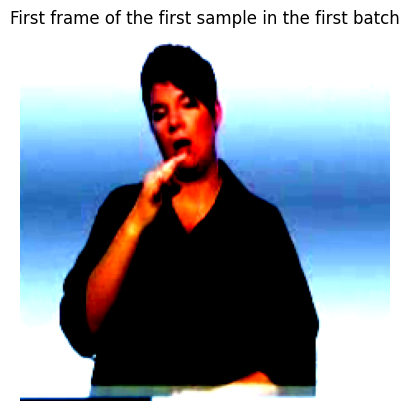

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from datasets.dataset import build_dataset
from utils import collate_fn

# args 설정
class Args:
    pass

args = Args()
args.dataset = 'phoenix-2014'
args.n_frames = 256
args.aug_size = (210,210)
args.video_size = (224,224)
args.metadata_path = '/nas/Dataset/Phoenix'
args.gloss_to_id_path = '/nas/Dataset/Phoenix/gloss2ids.pkl'
args.video_path = '/nas/Dataset/Phoenix/phoenix-2014-videos.zip'
args.t_min = 1
args.t_max = 1

# train 모드 데이터셋 생성
dataset = build_dataset(modal='video', is_train=True, is_test=False, args=args)

# DataLoader를 통해 배치 단위 로딩
# num_workers는 시스템 환경에 맞게 조정
# shuffle=True로 훈련시 샘플 순서를 섞을 수 있음
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn)

# 첫 번째 배치 가져오기
frames_batch, gloss_ids_batch, idx_batch = next(iter(dataloader))
# frames_batch: (B, C, T, H, W), gloss_ids_batch: (B, N), idx_batch: sample 인덱스 리스트

print("배치 내 샘플 개수:", frames_batch.size(0))
print("첫 번째 샘플 인덱스:", idx_batch[0])
print("첫 번째 샘플 프레임 텐서 크기:", frames_batch[0].shape)  # (C, T, H, W)
print("첫 번째 샘플 글로스 ID 크기:", gloss_ids_batch[0].shape)  # (N, )

# 첫 번째 샘플 첫 번째 프레임 시각화
first_frame = frames_batch[0][:, 0, :, :].permute(1, 2, 0).cpu().numpy()
first_frame = np.clip(first_frame, 0, 1)  # Normalize되어있다면 클립

plt.imshow(first_frame)
plt.title("First frame of the first sample in the first batch")
plt.axis('off')
plt.show()
